In [1]:
# Load the Data
import pandas as pd
df_benin = pd.read_csv('../data/benin-raw.csv')
df_benin.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
country = 'benin'  # change to your country name
file_path = f'../data/benin-raw.csv'

# Read the CSV file
df = pd.read_csv(file_path)
print('Data loaded successfully')
print('Data shape:', df.shape)


Data loaded successfully
Data shape: (525600, 19)


In [4]:
# 2. Check basic info
print('\nBasic Information:')
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

In [5]:
# 3. Summary statistics
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [6]:
# 4. Missing values
print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [14]:
# 5. Handle missing values (fill with median)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f'Filled missing values in {col} with median {median_value}')


Filled missing values in GHI with median 1.8
Filled missing values in DNI with median -0.1
Filled missing values in DHI with median 1.6
Filled missing values in ModA with median 4.5
Filled missing values in ModB with median 4.3
Filled missing values in WS with median 1.9
Filled missing values in WSgust with median 2.6


In [8]:
# 6. Detect outliers using Z-score
from scipy import stats
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in cols_to_check:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].fillna(df[col].median())))
        outliers = (z_scores > 3)
        print(f'{col}: {outliers.sum()} outliers found')

GHI: 89 outliers found
DNI: 0 outliers found
DHI: 3738 outliers found
ModA: 27 outliers found
ModB: 63 outliers found
WS: 3109 outliers found
WSgust: 3500 outliers found


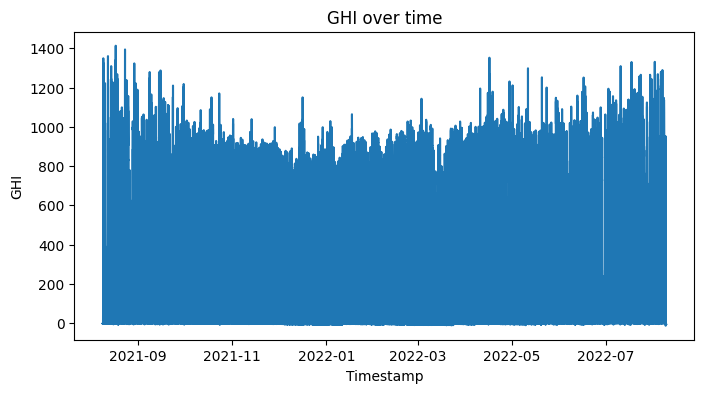

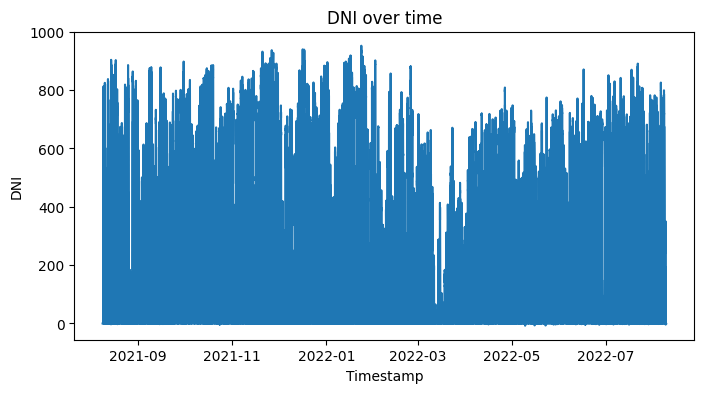

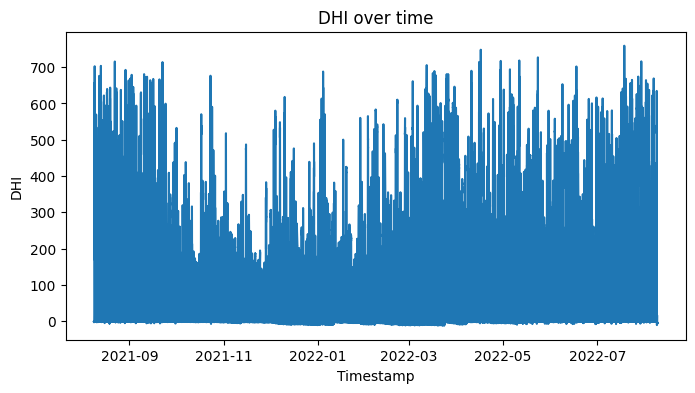

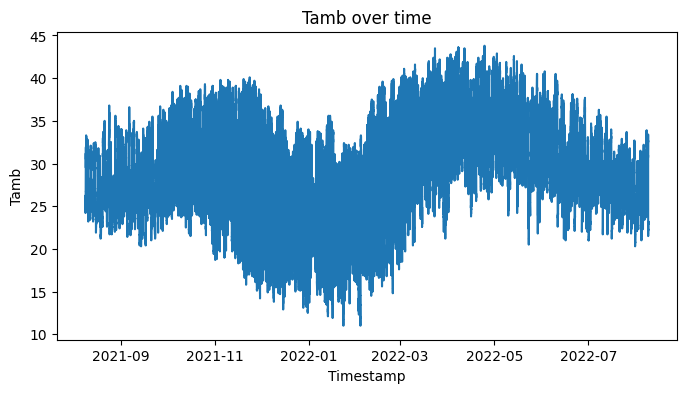

In [9]:
# 7. Simple plots
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')

    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            plt.plot(df['Timestamp'], df[col])
            plt.title(f'{col} over time')
            plt.xlabel('Timestamp')
            plt.ylabel(col)
            plt.show()

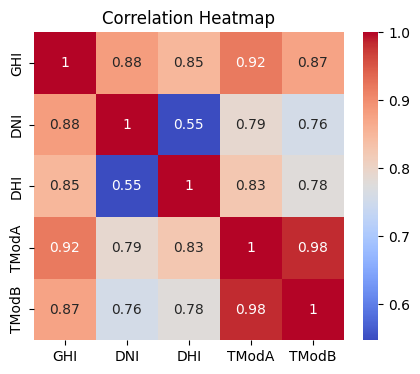

In [10]:
# 8. Correlation heatmap
import seaborn as sns
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

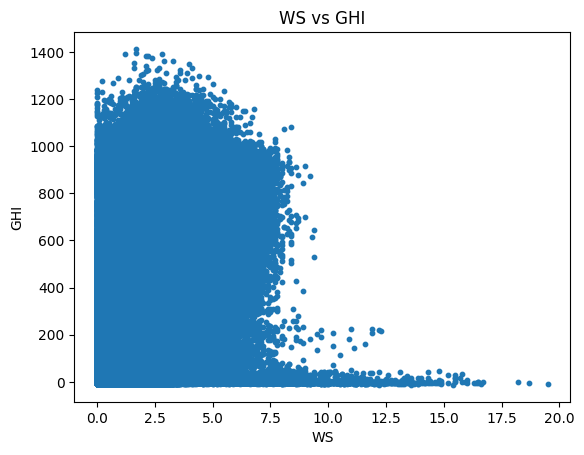

In [11]:
# 9. Scatter example (WS vs GHI)
if 'WS' in df.columns and 'GHI' in df.columns:
    plt.scatter(df['WS'], df['GHI'], s=10)
    plt.xlabel('WS')
    plt.ylabel('GHI')
    plt.title('WS vs GHI')
    plt.show()


In [13]:
# 10. Save cleaned data
output_file = f'../data/benin_clean.csv'
df.to_csv(output_file, index=False)
print('Cleaned data saved to', output_file)

Cleaned data saved to ../data/benin_clean.csv
